<a href="https://colab.research.google.com/github/choeuneheol/honrongmachine/blob/main/PART07_%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#-*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
###[Step 1-3] 데이터 준비

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('/content/auto_mpg.csv',header=None)
                
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?', np.nan,inplace=True)     #'?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) #누락데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float')    #문자열을 실수형으로 전환

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf= df[['mpg','cylinders','horsepower','weight']]

###[Step4] 데이터셋 구분 - 훈련용(train data)/검증용(test data)

In [15]:
#속성(변수) 선택
x=ndf[['cylinders','horsepower','weight']] # 독립 변수 x1, x2, x3
y=ndf['mpg'] #종족 변수 Y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=10)


print('훈련 데이터:', x_train.shape)
print('검증 데이터:', x_test.shape)
            

훈련 데이터: (274, 3)
검증 데이터: (118, 3)


###[Step 5] 단순회귀분석 모형 - sklearn 사용

In [16]:
#sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(x_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
r_square = lr.score(x_test, y_test)
print(r_square)
print('\n')

#회귀식의 기울기
print('x 변수의 계수 a:',lr.coef_)
print('\n')

#회귀식의 y절편
print('상수항 b',lr.intercept_)

0.6939048496695599


x 변수의 계수 a: [-0.60691288 -0.03714088 -0.00522268]


상수항 b 46.414351269634025


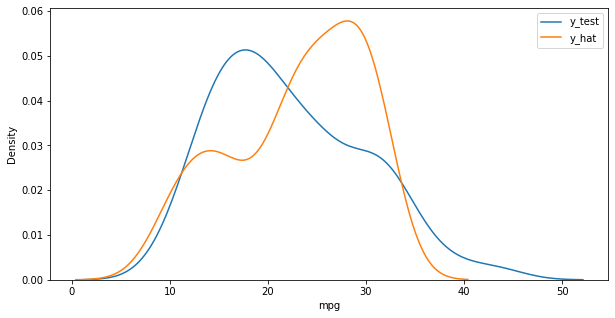

In [17]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출현
y_hat = lr.predict(x_test)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot (y_test, label='y_test')
ax2 = sns.kdeplot (y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()